In [1]:
import pandas as pd

In [2]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('alucar.csv')

In [4]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
print(f'Quantidade de linhas e colunas {alucar.shape}')

Quantidade de linhas e colunas (24, 2)


In [6]:
print(f'Quantidade de dados nulos {alucar.isna().sum().sum()}')

Quantidade de dados nulos 0


In [7]:
print('Qual tipo de dados das colunas')
print(f'{alucar.dtypes}')

Qual tipo de dados das colunas
mes       object
vendas     int64
dtype: object


In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [9]:
print('Qual tipo de dados das colunas')
print(f'{alucar.dtypes}')

Qual tipo de dados das colunas
mes       datetime64[ns]
vendas             int64
dtype: object


In [10]:
!pip install seaborn
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [11]:
print(sns.__version__)

0.9.0


<AxesSubplot:xlabel='mes', ylabel='vendas'>

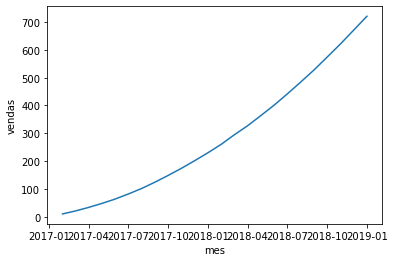

In [12]:
sns.lineplot(x= 'mes', y = 'vendas', data = alucar)

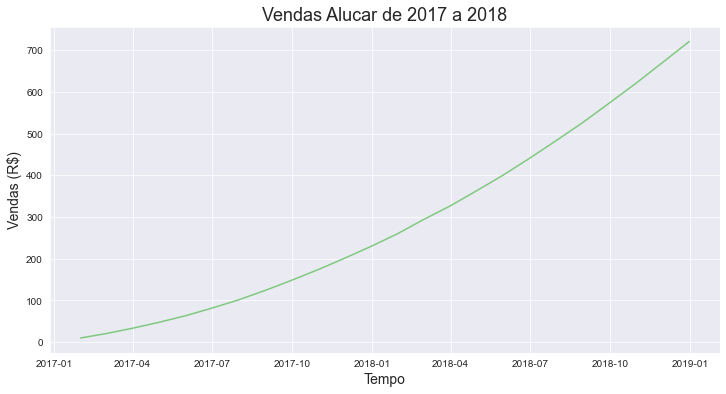

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x= 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 a 2018', loc ='center', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [14]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


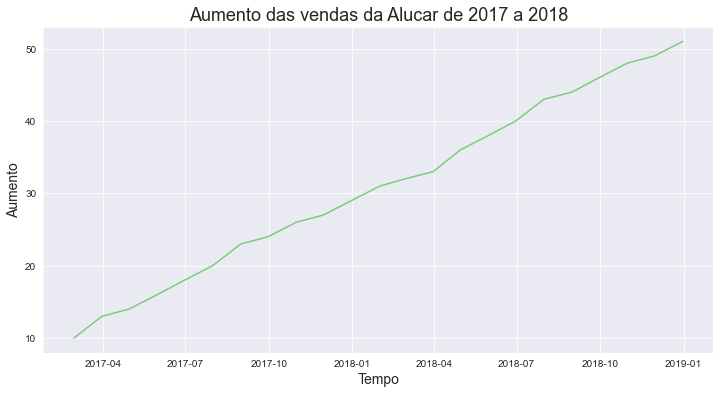

In [15]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x= 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 a 2018', loc ='center', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [16]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc ='center', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

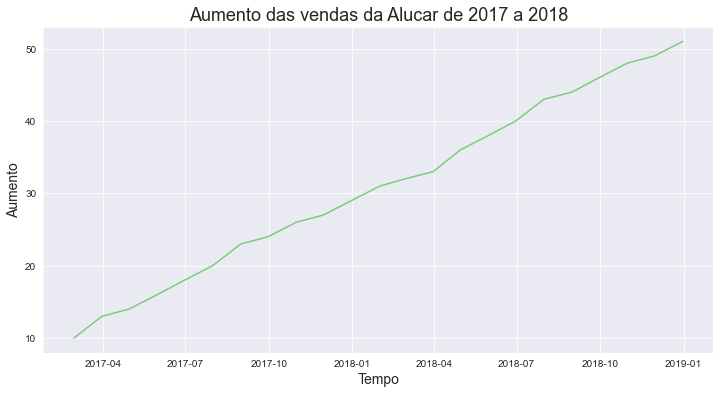

In [17]:
plotar('Aumento das vendas da Alucar de 2017 a 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [18]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


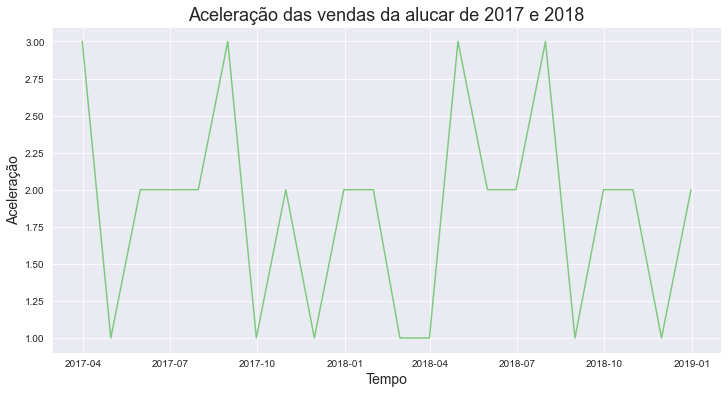

In [19]:
plotar('Aceleração das vendas da alucar de 2017 e 2018', 'Tempo','Aceleração','mes', 'aceleracao', alucar)

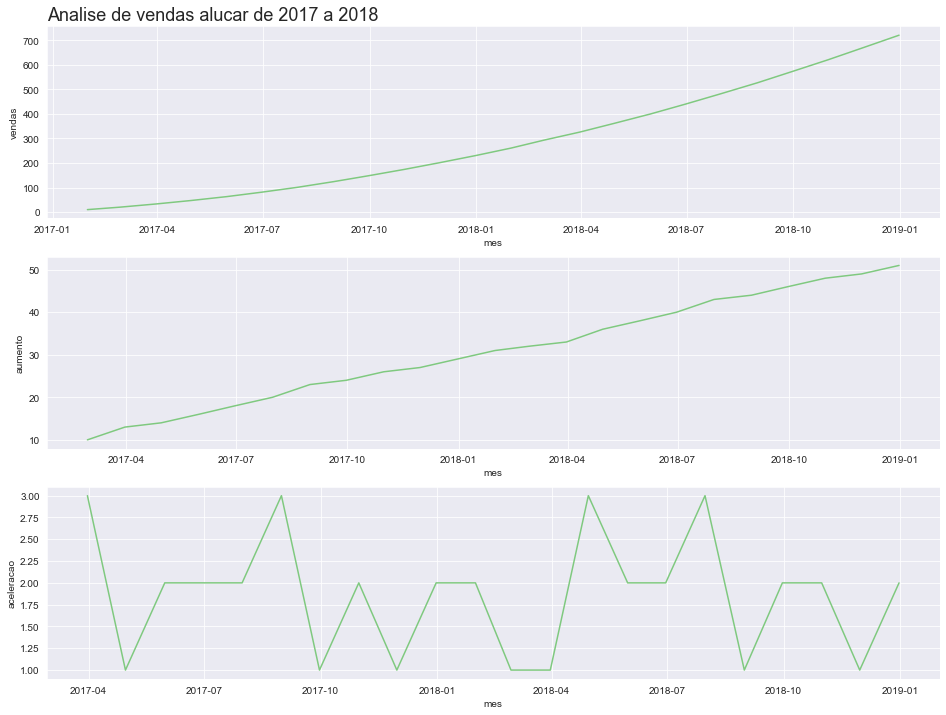

In [20]:
plt.figure(figsize= (16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise de vendas alucar de 2017 a 2018', fontsize = 18, loc = 'left')
ax = sns.lineplot(x= 'mes', y = 'vendas', data = alucar)
plt.subplot(3,1,2)
ax = sns.lineplot(x= 'mes', y = 'aumento', data = alucar)
plt.subplot(3,1,3)
ax = sns.lineplot(x= 'mes', y = 'aceleracao', data = alucar)
ax = ax

In [21]:
def plot_comparacao(x, y1, y2, y3,dataset, titulo):
    plt.figure(figsize= (16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    ax = sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3,1,2)
    ax = sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3,1,3)
    ax = sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax

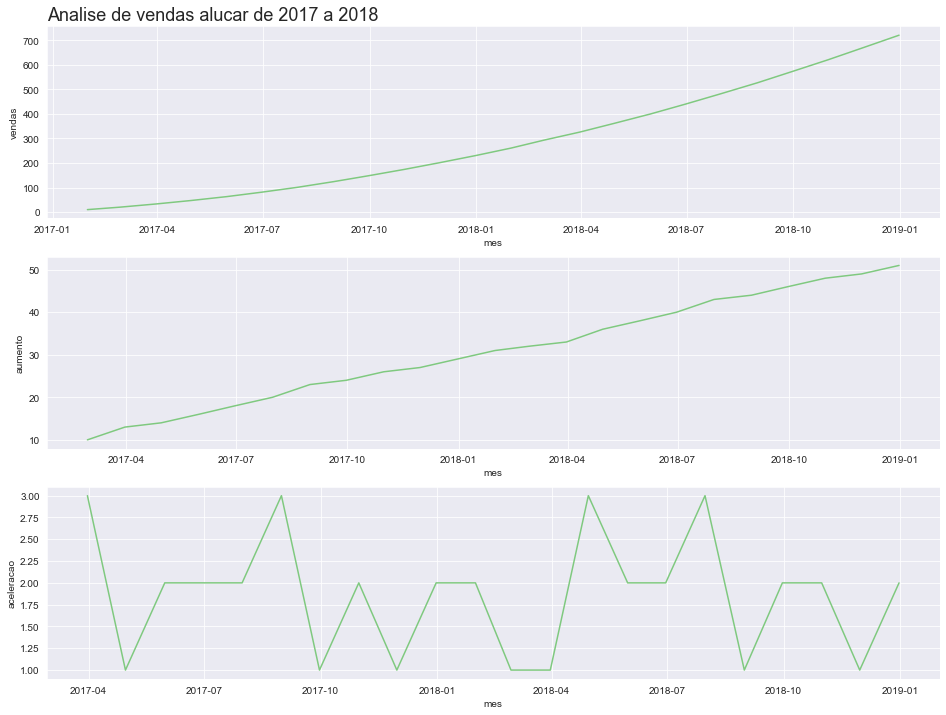

In [22]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar,'Analise de vendas alucar de 2017 a 2018' )

In [23]:
from pandas.plotting import autocorrelation_plot

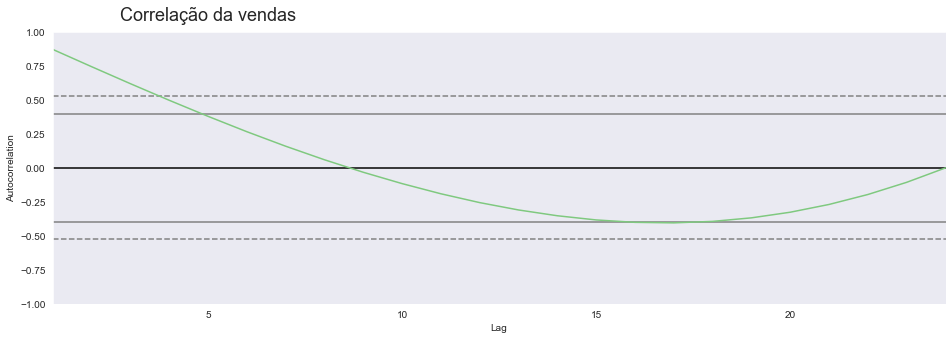

In [24]:
ax = plt.figure(figsize = (16,5))
ax.suptitle('Correlação da vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax 

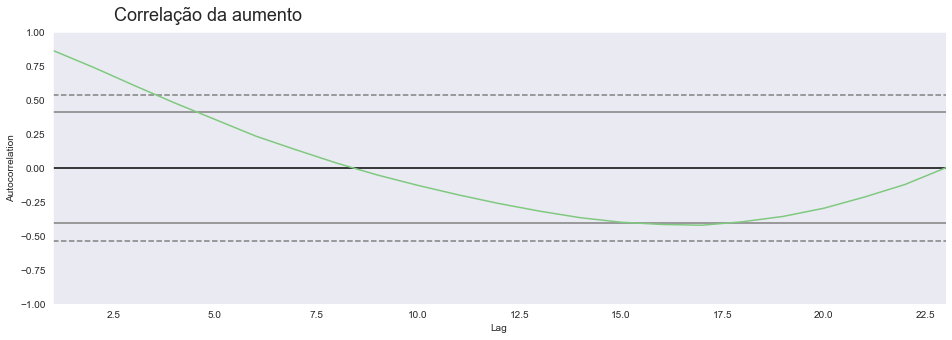

In [25]:
ax = plt.figure(figsize = (16,5))
ax.suptitle('Correlação da aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

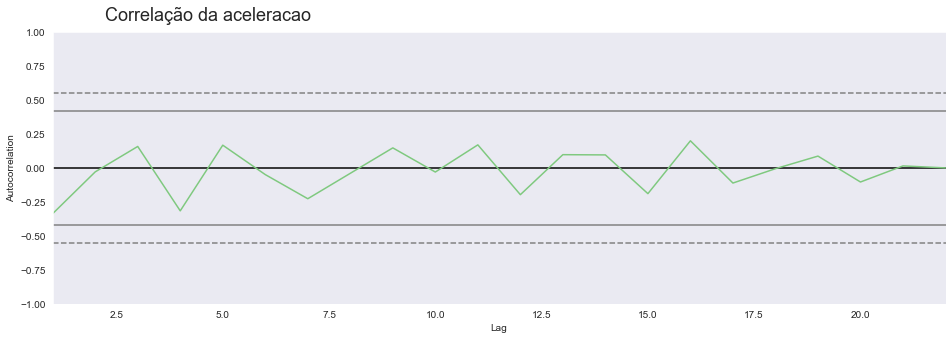

In [26]:
ax = plt.figure(figsize = (16,5))
ax.suptitle('Correlação da aceleracao', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

In [27]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [28]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [29]:
print(f'A quantidade de linhas e colunas e {assinantes.shape}')
print(f'A quantidade de dados nulos e {assinantes.isna().sum().sum()}')

A quantidade de linhas e colunas e (24, 2)
A quantidade de dados nulos e 0


In [30]:
assinantes['mes'] = pd.to_datetime(assinantes['mes']) 
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [31]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


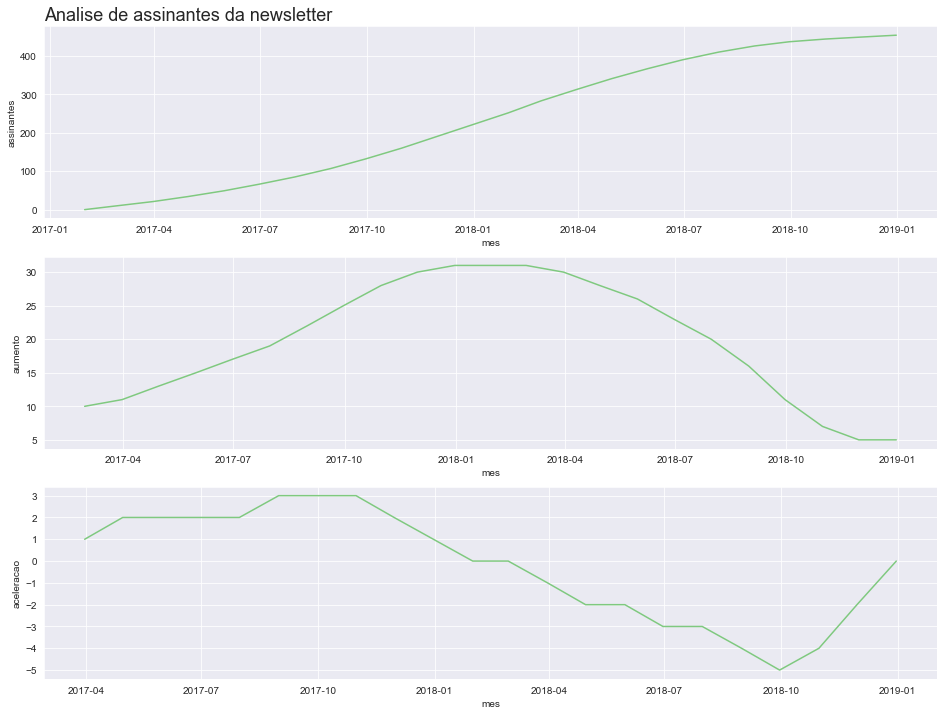

In [32]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Analise de assinantes da newsletter')